In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_summary = pd.read_csv('Measurement_summary.csv')
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [3]:
df_summary['Measurement date'] = pd.to_datetime(df_summary['Measurement date'])
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
Measurement date    647511 non-null datetime64[ns]
Station code        647511 non-null int64
Address             647511 non-null object
Latitude            647511 non-null float64
Longitude           647511 non-null float64
SO2                 647511 non-null float64
NO2                 647511 non-null float64
O3                  647511 non-null float64
CO                  647511 non-null float64
PM10                647511 non-null float64
PM2.5               647511 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 54.3+ MB


In [4]:
#split the date and time into different columns
date = lambda x: x.date()
time = lambda x: x.time()
df_summary['date'] = df_summary['Measurement date'].apply(date) #authomatically deletes the measurement date
df_summary['time'] = df_summary['Measurement date'].apply(time) #authomatically deletes the measurement date

df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00:00
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00:00
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00:00
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00:00
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00:00


In [5]:
#drop the measurement date column
df_summary.head()


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00:00
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00:00
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00:00
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00:00
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00:00


In [6]:
#lets get the aggregate values of SO2 NO2 O3 CO PM10 AND PM2.5
aggregate_pollution = df_summary.groupby('date').agg({'SO2' : ['mean', 'min', 'max'], 'NO2' : ['mean','min', 'max'],
                                                     'O3' : ['mean','min', 'max'], 'PM10' : ['mean','min', 'max'],
                                                     'PM2.5' : ['mean','min', 'max']})
aggregate_pollution.head()

SO2                   NO2                    O3              \
                mean  min    max      mean  min    max      mean  min    max   
date                                                                           
2017-01-01  0.003627 -1.0  0.010  0.044765 -1.0  0.076  0.002478 -1.0  0.026   
2017-01-02  0.002707 -1.0  0.069  0.035960 -1.0  0.069  0.013127 -1.0  0.057   
2017-01-03  0.000602 -1.0  0.010  0.037017 -1.0  0.079  0.008223 -1.0  0.038   
2017-01-04  0.004122 -1.0  0.010  0.048813 -1.0  0.088  0.006918 -1.0  0.041   
2017-01-05  0.003122 -1.0  0.010  0.033892 -1.0  0.071  0.009725 -1.0  0.034   

                  PM10                  PM2.5              
                  mean  min    max       mean  min    max  
date                                                       
2017-01-01   77.201667 -1.0  117.0  56.773333 -1.0   87.0  
2017-01-02  109.243333 -1.0  236.0  77.838333 -1.0  237.0  
2017-01-03   78.546667 -1.0  180.0  51.533333 -1.0  141.0  
2017-01-04   54.966667 -1.0  108.0  34.533333 -1.0   78.0  
2017-01-05   36.246667 -1.0  117.0  22.168333 -1.0   73.0

In [7]:
aggregate_pollution.tail()

SO2                     NO2                      O3         \
                mean    min    max      mean    min    max      mean    min   
date                                                                          
2019-12-27  0.003433  0.002  0.063  0.028083  0.007  0.070  0.018195  0.001   
2019-12-28  0.003710  0.002  0.007  0.043712  0.019  0.067  0.005945  0.000   
2019-12-29  0.003337  0.002  0.008  0.037145  0.006  0.061  0.008980  0.000   
2019-12-30  0.003272  0.002  0.059  0.031195  0.005  0.058  0.012347  0.001   
2019-12-31  0.002880  0.002  0.006  0.017532  0.005  0.047  0.020642  0.001   

                        PM10                   PM2.5               
              max       mean   min    max       mean   min    max  
date                                                               
2019-12-27  0.038  34.030000   7.0  103.0  24.853333  -1.0  985.0  
2019-12-28  0.040  42.831667  19.0   73.0  25.313333   8.0   46.0  
2019-12-29  0.033  44.428333  18.0   66.0  27.306667  11.0   41.0  
2019-12-30  0.034  38.031667  13.0  985.0  27.060000   7.0  985.0  
2019-12-31  0.048  25.448333  -1.0  149.0  14.786667   1.0   34.0

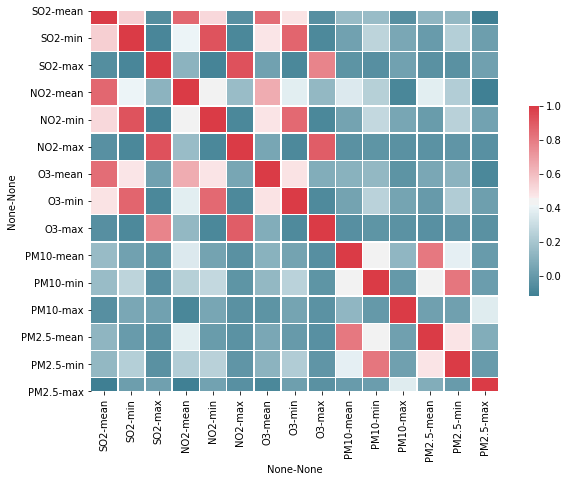

In [8]:
#plotting a correlation map to see how they each of the elements correlate with eachother

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = aggregate_pollution.corr()

fig, ax = plt.subplots(figsize=(11,7))

#draw the heat map
ax=sns.heatmap(corr, cmap=cmap, vmax=1, square=True, linewidth=.5, cbar_kws={"shrink": .5})

<p> AS YOU CAN SEE FROM THE ABOVE, respirable particulate matter 2.5 And 10 seems to have a highe correlation</p>

In [20]:
#let us construct a graph showing the date and when we experienced a  higher respirable particulate matter 
#draw a map for pm10 and pm2.5
#let us aggregate the values
#first we will separte the date into month and create a month column
month = lambda x: x.month
df_summary['month']= df_summary.date.apply(month)

#now lets some statistics like mean, max, min
aggregate_poll = df_summary.groupby('month').agg({'PM10' : ['mean','min', 'max'],
                                                    'PM2.5' : ['mean','min', 'max']})
aggregate_poll

PM10                   PM2.5             
            mean  min     max       mean  min     max
month                                                
1      59.450578 -1.0  3586.0  35.151950 -1.0   985.0
2      52.757599 -1.0  1985.0  32.366468 -1.0   985.0
3      61.500099 -1.0  1985.0  40.796490 -1.0   985.0
4      50.501028 -1.0  1985.0  25.538175 -1.0  6256.0
5      54.043716 -1.0  1985.0  26.553208 -1.0   985.0
6      38.039630 -1.0  1985.0  24.378741 -1.0   985.0
7      30.265274 -1.0  2172.0  20.736572 -1.0   985.0
8      26.948348 -1.0  3403.0  16.215528 -1.0   995.0
9      26.804168 -1.0  1985.0  15.341071 -1.0   985.0
10     29.284624 -1.0  1985.0  15.561004 -1.0   985.0
11     47.793444 -1.0  1985.0  24.668278 -1.0   985.0
12     48.928901 -1.0  3400.0  29.124450 -1.0   985.0

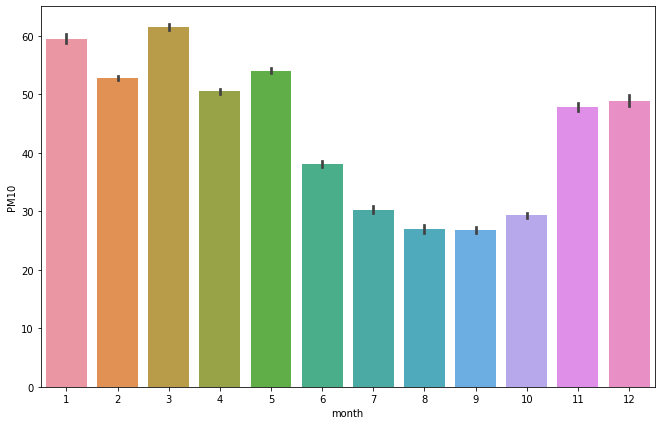

In [21]:
#lets construt a barplot to show the distribution. Using seaborn. We will get an aggregate value
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(data=df_summary, x='month', y='PM10')

<P style='text-transform: uppercase;'> FROM THE BARPLOT ABOVE, WE CAN SEE THAT THE respirable particulate matter 10 seems to BE HIGH IN FROM THE 
JANUARY UP TILL MAY AND IN SUMMER SEEMS TO REDUCE A BIT. HOWEVER IN THE MONTHS OF NOVEMBER AND DECEMBER WE EXPERIENCE
AN INCREASE. THE DECREASE EXPERIENCED IN THE 6-9 MONTH MAY BE DUE TO RAIN</P>

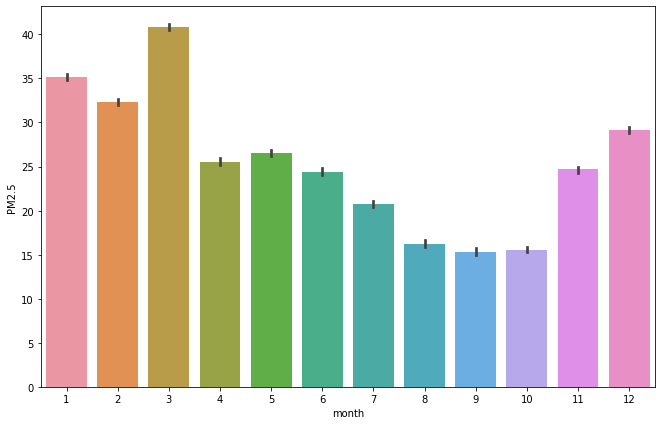

In [22]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(data=df_summary, x='month', y='PM2.5')

<P style='text-transform: uppercase;'> Looking at the bAR PLOT FOR PM2.5 gives similar results. The variation from months 6-9 is small probably due to rains during those months.</P>

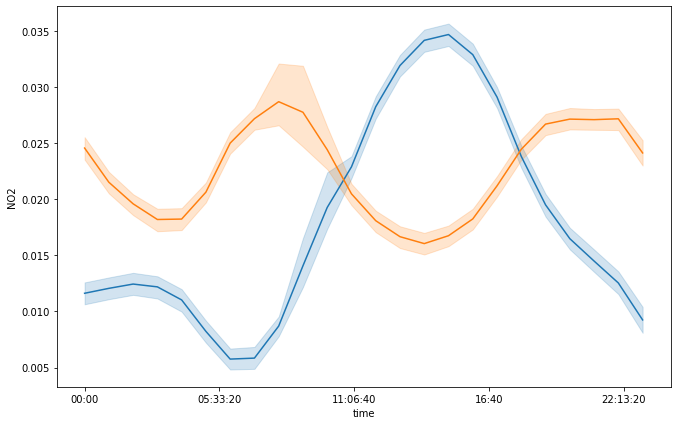

In [52]:
#lets show a time series for the pm10 and pm2
fig, ax = plt.subplots(figsize=(11,7))
ax= sns.lineplot(data=df_summary, x='time', y='O3')
ax= sns.lineplot(data=df_summary, x='time', y='NO2')

In [49]:
#LET US SEE THE DIFFERENT STATION CODES THIS DATA WERE COLLECTED AND THEIR AUTHENCITY OR HOW CLOSE THEY ARE TO SEOUL
stations = df_summary.groupby(['Station code','Latitude', 'Longitude', 'Address'])['Station code'].count()
stations.sort_values(ascending=False) 

Station code  Latitude   Longitude   Address                                                          
110           37.584848  127.094023  369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea             25906
116           37.544640  126.835151  71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea        25906
101           37.572016  127.005007  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea            25905
124           37.502686  127.092509  236, Baekjegobun-ro, Songpa-gu, Seoul, Republic of Korea             25905
102           37.564263  126.974676  15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea                25905
122           37.504547  126.994458  16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea          25905
121           37.487355  126.927102  14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea              25905
106           37.555580  126.905598  10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea                25905
1

<P style='text-transform: uppercase;'> From the above we can see in descending order the stations, 
longitude and latitude where this data are collected.</P>